# Tutorial-3: Data and Information Visualization (MCA207D)

This notebook demonstrates data visualization techniques using Matplotlib and Seaborn on several datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## SECTION A — Matplotlib Basics (sales_data.csv)

In [2]:
sales = pd.read_csv("sales_data.csv")
print(sales.head())

  Month Region  Sales  Profit  Customers
0   Jan  North  12000    2300        120
1   Feb  North  15000    3000        140
2   Mar  North  18000    3400        155
3   Jan  South  10000    1800        100
4   Feb  South  13000    2500        125


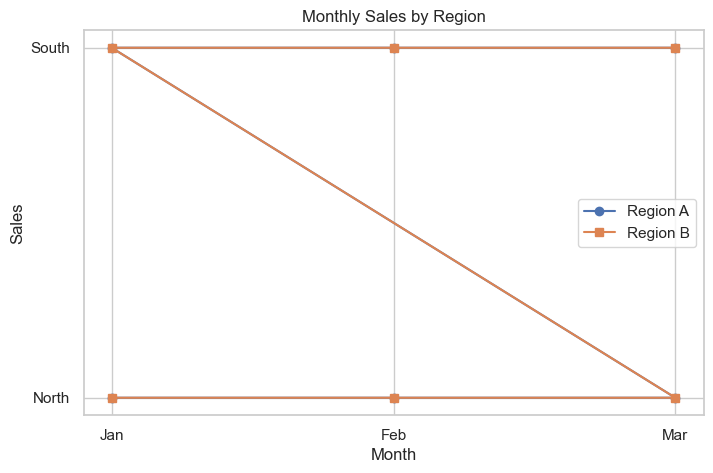

In [6]:
# 1️⃣ Line Chart – Monthly Sales by Region
plt.figure(figsize=(8,5))
plt.plot(sales['Month'], sales['Region'], marker='o', label='Region A')
plt.plot(sales['Month'], sales['Region'], marker='s', label='Region B')
plt.title('Monthly Sales by Region')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# 2️⃣ Grouped Bar Chart – Profit Comparison by Region
plt.figure(figsize=(8,5))
width = 0.35
x = range(len(sales['Month']))
plt.bar([i - width/2 for i in x], sales['Profit_Region_A'], width, label='Region A')
plt.bar([i + width/2 for i in x], sales['Profit_Region_B'], width, label='Region B')
plt.xticks(x, sales['Month'])
plt.title('Profit Comparison by Region')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend()
plt.show()

KeyError: 'Profit_Region_A'

<Figure size 800x500 with 0 Axes>

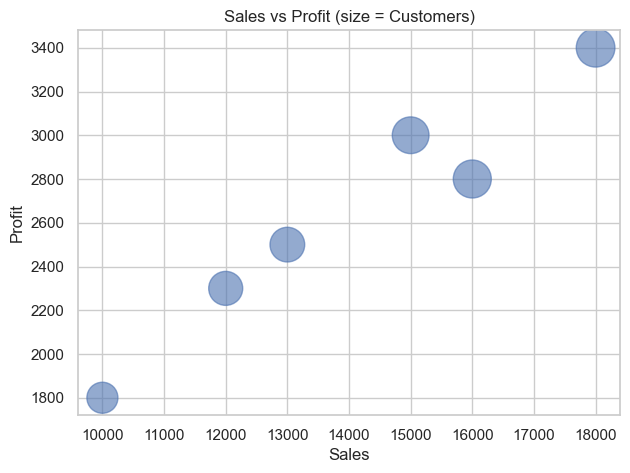

In [7]:
# 3️⃣ Scatter Chart – Sales vs Profit, size = Customers
plt.figure(figsize=(7,5))
plt.scatter(sales['Sales'], sales['Profit'], s=sales['Customers']*5, alpha=0.6)
plt.title('Sales vs Profit (size = Customers)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

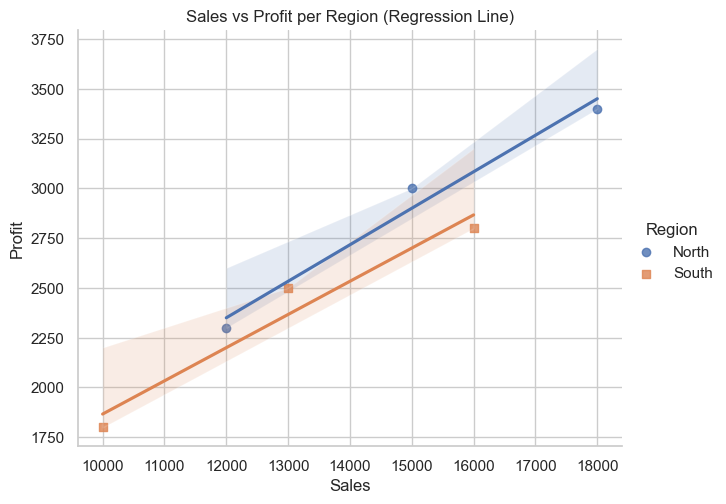

In [8]:
# 4️⃣ Scatter Plot with Regression Line (per Region)
sns.lmplot(x='Sales', y='Profit', data=sales, hue='Region', markers=['o', 's'], height=5, aspect=1.3)
plt.title('Sales vs Profit per Region (Regression Line)')
plt.show()

## SECTION B — Seaborn Basics (students_performance.csv)

In [9]:
students = pd.read_csv("students_performance.csv")
print(students.head())

   Gender Class  Math_Score  Reading_Score  Writing_Score  Study_Hours
0  Female     A          88             92             91          4.0
1    Male     A          78             70             72          2.5
2  Female     B          95             96             94          5.0
3    Male     B          82             78             80          3.5
4  Female     C          72             75             70          2.0


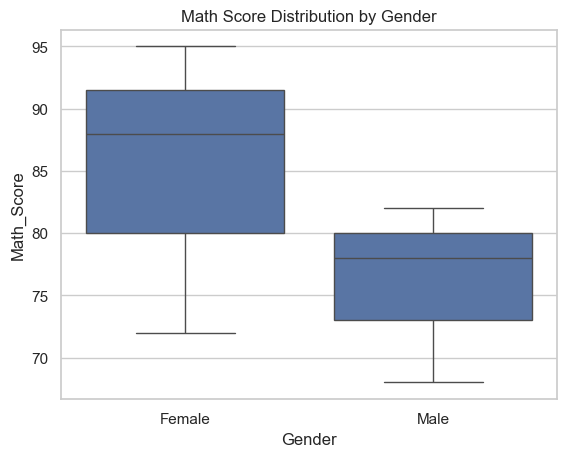

In [10]:
# 1️⃣ Boxplot — Math_Score by Gender
sns.boxplot(x='Gender', y='Math_Score', data=students)
plt.title('Math Score Distribution by Gender')
plt.show()

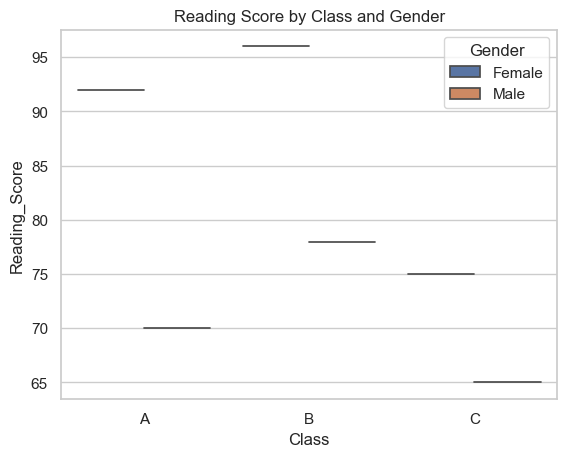

In [11]:
# 2️⃣ Violin Plot — Reading_Score across Class, colored by Gender
sns.violinplot(x='Class', y='Reading_Score', hue='Gender', data=students, split=True)
plt.title('Reading Score by Class and Gender')
plt.show()

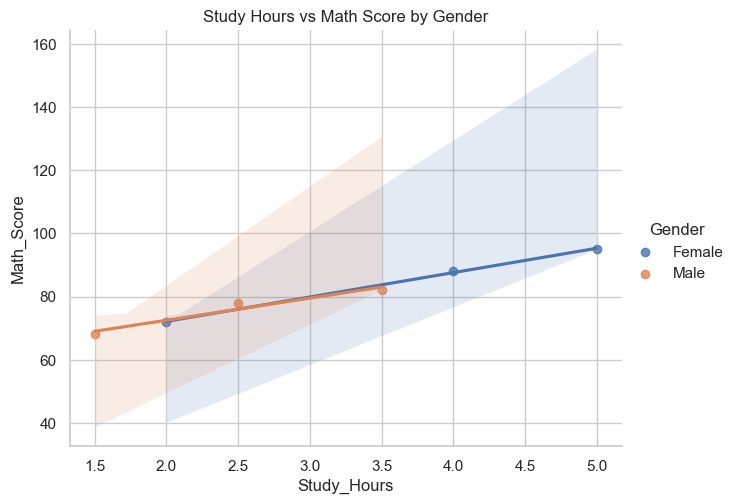

In [12]:
# 3️⃣ Scatter Plot — Study_Hours vs Math_Score (with Regression)
sns.lmplot(x='Study_Hours', y='Math_Score', hue='Gender', data=students, height=5, aspect=1.3)
plt.title('Study Hours vs Math Score by Gender')
plt.show()

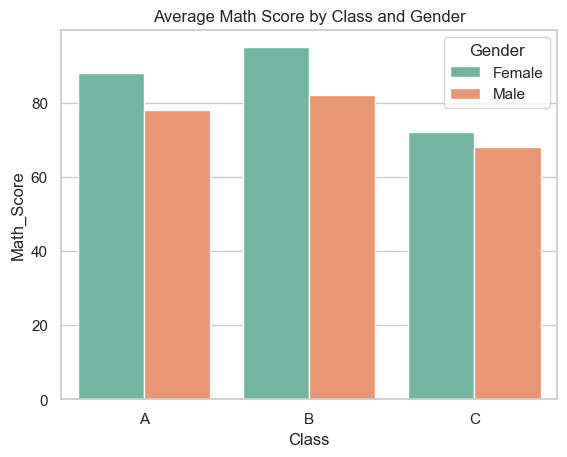

In [13]:
# 4️⃣ Grouped Bar Plot — Avg Math_Score by Class and Gender
avg_score = students.groupby(['Class','Gender'])['Math_Score'].mean().reset_index()
sns.barplot(x='Class', y='Math_Score', hue='Gender', data=avg_score, palette='Set2')
plt.title('Average Math Score by Class and Gender')
plt.show()

## SECTION C — Advanced Statistical Visualizations (mpg)

In [14]:
mpg = sns.load_dataset('mpg')
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


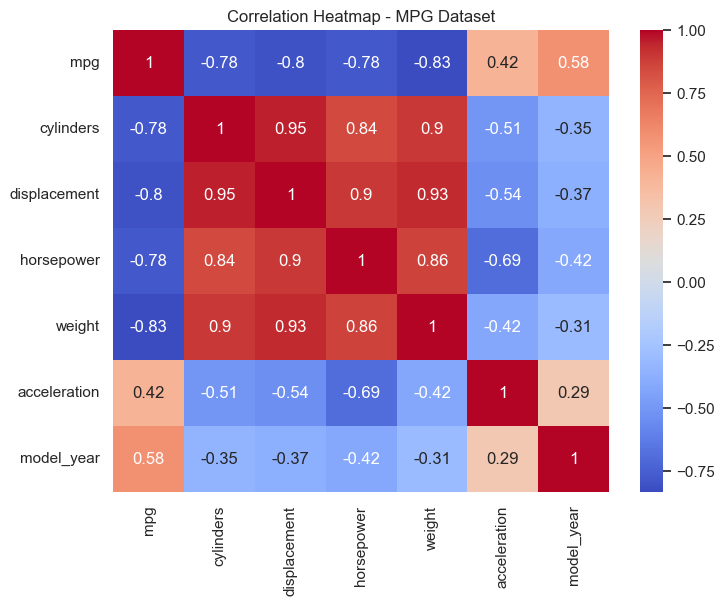

In [15]:
# 1️⃣ Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(mpg.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - MPG Dataset')
plt.show()

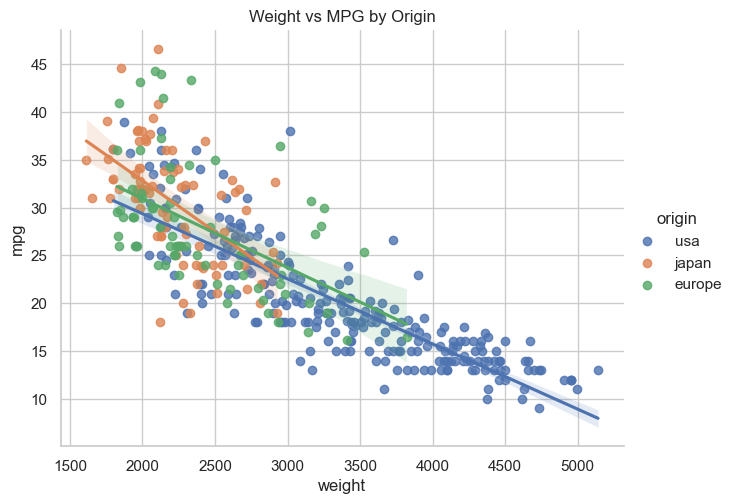

In [16]:
# 2️⃣ Regression Line — weight vs mpg with hue=origin
sns.lmplot(x='weight', y='mpg', hue='origin', data=mpg, height=5, aspect=1.3)
plt.title('Weight vs MPG by Origin')
plt.show()

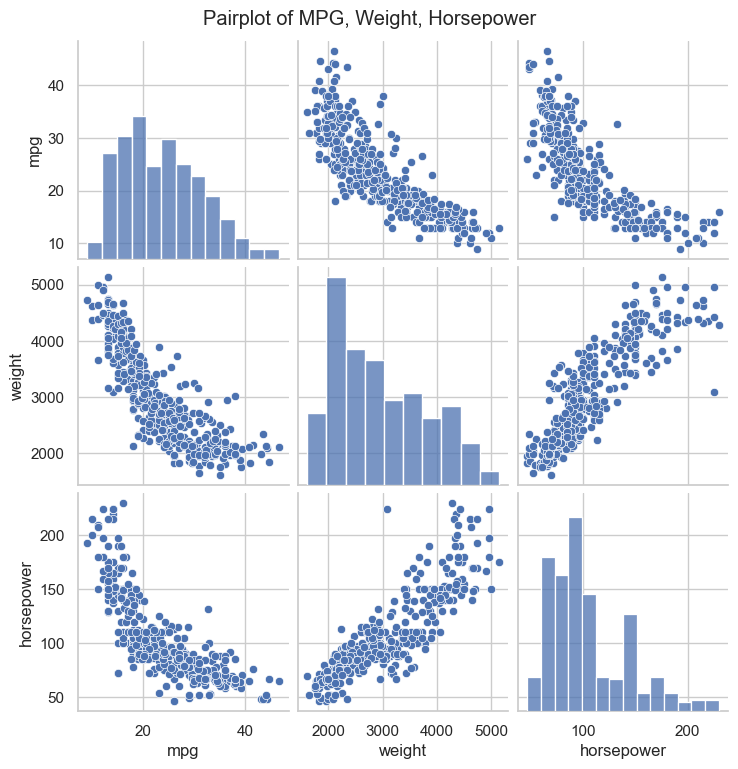

In [17]:
# 3️⃣ Pairplot — mpg, weight, horsepower
sns.pairplot(mpg[['mpg','weight','horsepower']])
plt.suptitle('Pairplot of MPG, Weight, Horsepower', y=1.02)
plt.show()

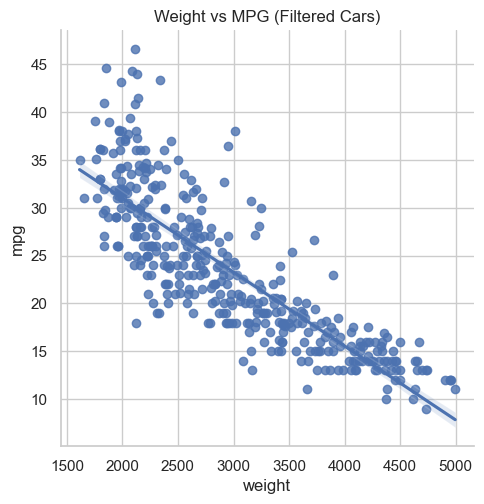

In [18]:
# 4️⃣ Filtered Regression Plot
filtered = mpg[(mpg['mpg'] < 50) & (mpg['weight'] < 5000)]
sns.lmplot(x='weight', y='mpg', data=filtered)
plt.title('Weight vs MPG (Filtered Cars)')
plt.show()

## SECTION D — Encoding and Faceting (tips)

In [19]:
tips = sns.load_dataset('tips')

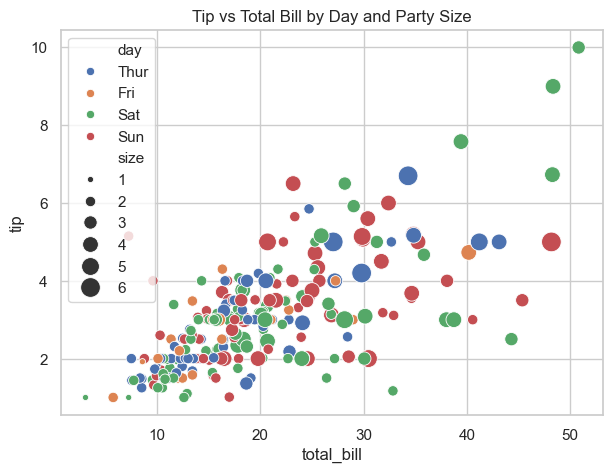

In [20]:
# 1️⃣ Scatter — total_bill vs tip (encode day & size)
plt.figure(figsize=(7,5))
sns.scatterplot(x='total_bill', y='tip', hue='day', size='size', data=tips, sizes=(20,200))
plt.title('Tip vs Total Bill by Day and Party Size')
plt.show()

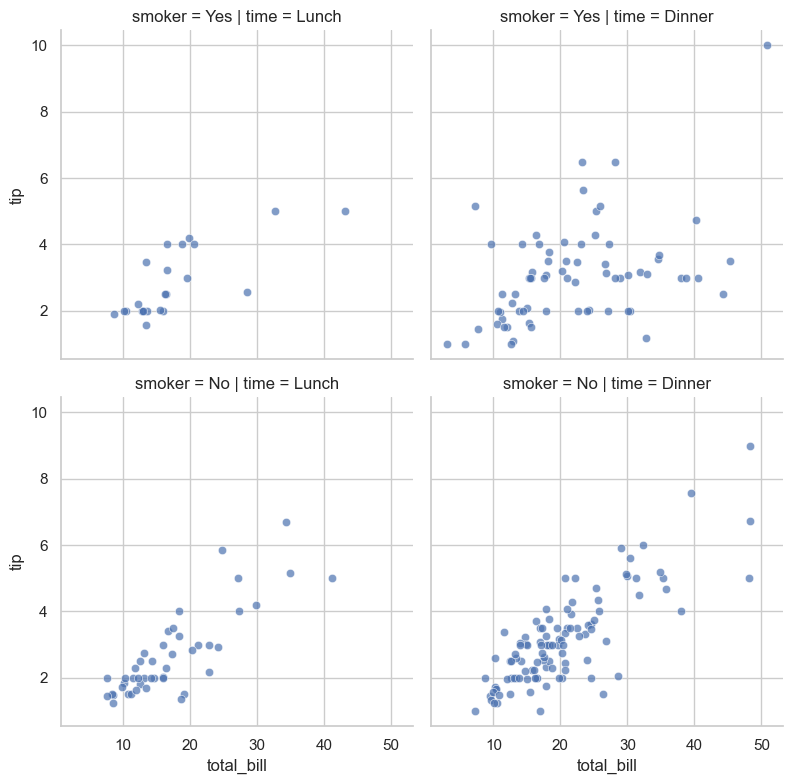

In [21]:
# 2️⃣ FacetGrid — scatter by time and smoker
g = sns.FacetGrid(tips, col='time', row='smoker', height=4)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', alpha=0.7)
g.add_legend()
plt.show()

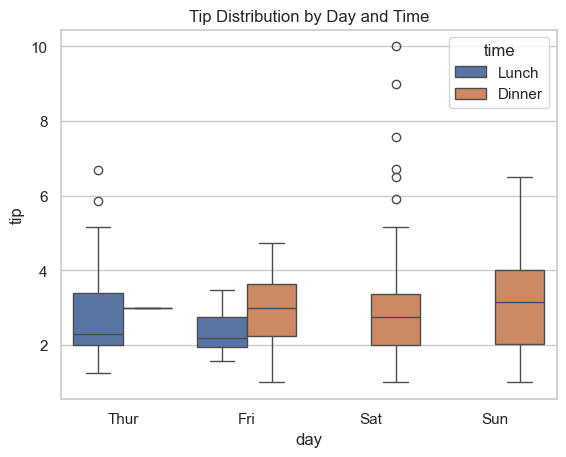

In [22]:
# 3️⃣ Boxplot — tip by day with hue=time
sns.boxplot(x='day', y='tip', hue='time', data=tips)
plt.title('Tip Distribution by Day and Time')
plt.show()

## SECTION E — Country Data (country_data.csv)

In [23]:
country = pd.read_csv("country_data.csv")
print(country.head())

  Country  GDP_per_capita  Internet_Users  Literacy_Rate  Happiness_Index
0   India            2200              55             74              4.0
1     USA           65000              90             99              7.2
2   Japan           40000              88             99              6.0
3  Brazil            9500              70             92              5.5


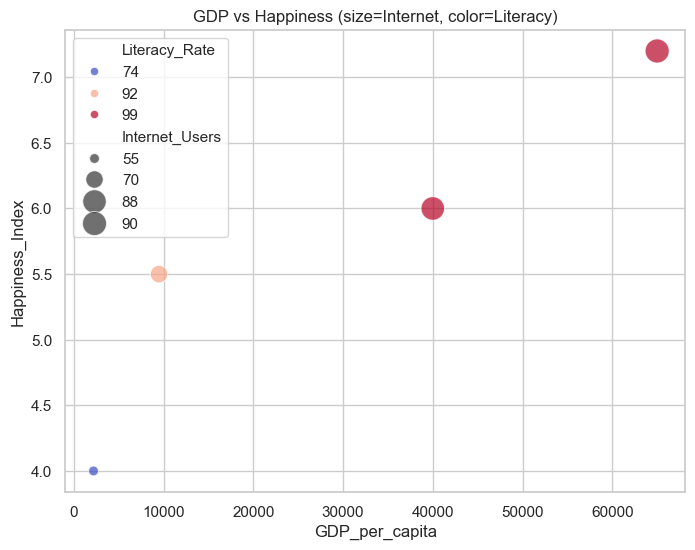

In [24]:
# 1️⃣ Scatter: GDP vs Happiness (size=Internet_Users, color=Literacy_Rate)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='GDP_per_capita', y='Happiness_Index',
    size='Internet_Users', hue='Literacy_Rate',
    data=country, sizes=(50,300), palette='coolwarm', alpha=0.7
)
plt.title('GDP vs Happiness (size=Internet, color=Literacy)')
plt.show()

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_15656\3975562767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='GDP_per_capita', data=country_sorted, palette='viridis')


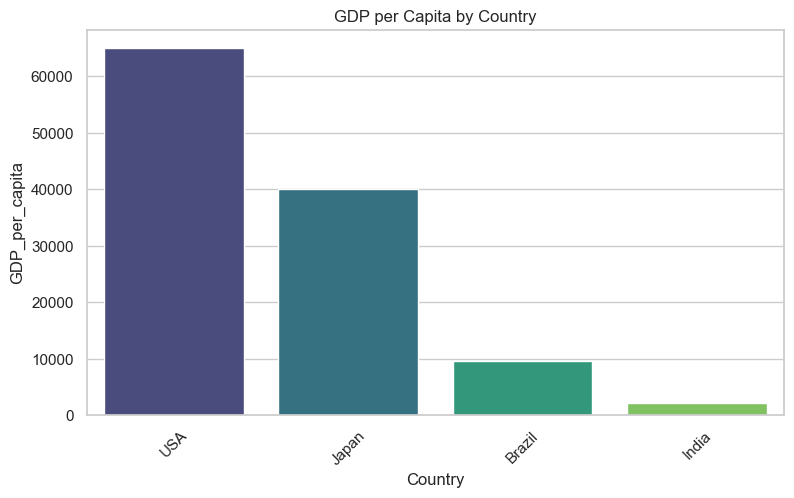

In [25]:
# 2️⃣ Bar Chart — GDP per capita by Country (sorted)
country_sorted = country.sort_values('GDP_per_capita', ascending=False)
plt.figure(figsize=(9,5))
sns.barplot(x='Country', y='GDP_per_capita', data=country_sorted, palette='viridis')
plt.xticks(rotation=45)
plt.title('GDP per Capita by Country')
plt.show()

## SECTION F — Mini Project (Example)

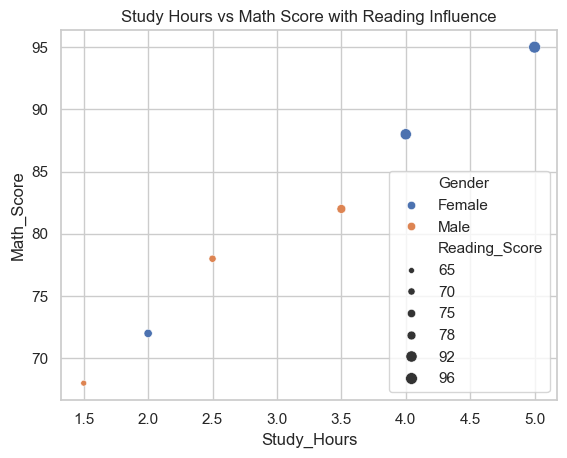

In [26]:
# Example Question: Does Study_Hours affect Math_Score?
sns.scatterplot(x='Study_Hours', y='Math_Score', hue='Gender', size='Reading_Score', data=students)
plt.title('Study Hours vs Math Score with Reading Influence')
plt.show()

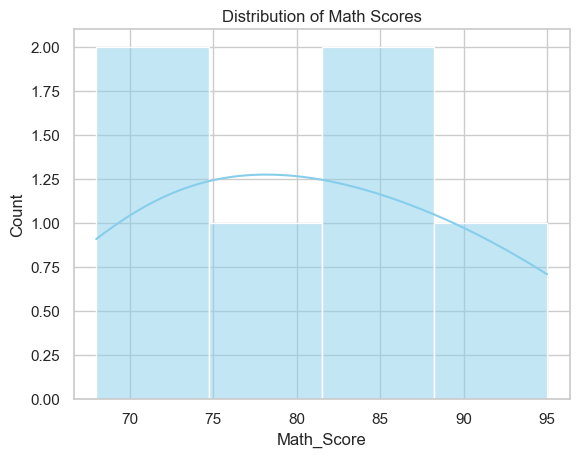

In [27]:
# Histogram for Math_Score distribution
sns.histplot(students['Math_Score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.show()

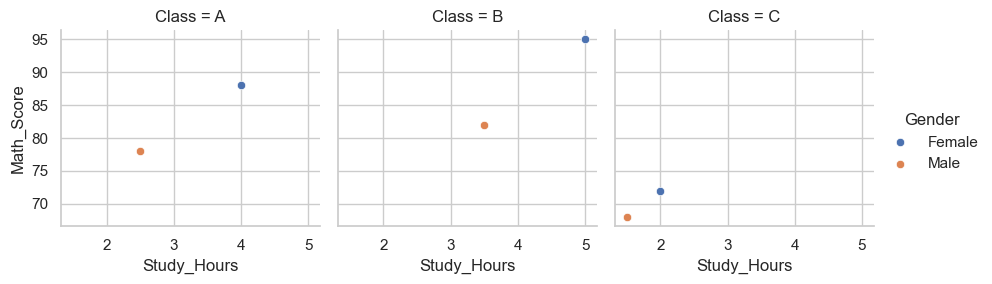

In [28]:
# FacetGrid – Study_Hours vs Math_Score by Class
g = sns.FacetGrid(students, col='Class', hue='Gender')
g.map_dataframe(sns.scatterplot, x='Study_Hours', y='Math_Score')
g.add_legend()
plt.show()